## selenium으로 데이터 가져오기

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [2]:
driver = webdriver.Chrome("chromedriver.exe")

In [3]:
driver.get('https://www.youtube.com/channel/UCyn-K7rZLXjGl7VXGweIlcA/videos')

In [4]:
body = driver.find_element_by_tag_name('body')

In [5]:
# 스크롤 내리면서 탐색
SCROLL_PAUSE_TIME = 1
old_last_height = driver.execute_script('return document.documentElement.scrollHeight')
while True:
    body.send_keys(Keys.END)
    time.sleep(SCROLL_PAUSE_TIME)
    last_height = driver.execute_script('return document.documentElement.scrollHeight')
    if last_height==old_last_height:
        break
    old_last_height = last_height

In [6]:
driver.execute_script('return document.documentElement.scrollHeight')

5918

In [7]:
dm_lst = driver.find_elements_by_id('dismissable')

In [8]:
# 유튜브 게시물에서 정보 받아오기
title_lst = []
time_lst = []
num_lst = []

for dm in dm_lst:
    title_lst.append(dm.find_element_by_id('video-title').text)
    
    ti = dm.find_element_by_id('overlays').text.split(':')
    if len(ti) == 3:
        sec = int(ti[0])*3600 + int(ti[1])*60 + int(ti[2])
    elif len(ti) == 2:
        sec = int(ti[0])*60 + int(ti[1])
    time_lst.append(sec)
    
    temp_num = dm.find_element_by_id('metadata-line').text[4:].split('\n')[0]
    if temp_num.find('만회') != -1:
        num = float(temp_num.replace('만회',''))*10000
    elif temp_num.find('억회') != -1:
        num = float(temp_num.replace('억회',''))*10000000
    elif temp_num.find('천회') != -1:
        num = float(temp_num.replace('천회',''))*1000
    elif temp_num.find('백회') != -1:
        num = float(temp_num.replace('백회',''))*100
    elif temp_num.find('회') != -1:
        num = float(temp_num.replace('회',''))
    num_lst.append(num)

## 판다스 이용해서 데이터 저장

In [9]:
import pandas as pd

In [10]:
dict_youtube={"title":title_lst, "video_time":time_lst, "view_num":num_lst}
youtube = pd.DataFrame(dict_youtube)
youtube.head()

,title,video_time,view_num
0,'우리 가게를 와본 사람보다 안 와본 사람이 훨씬 많아요.' ㅣ 백종원의 장사이야기,405,4000.0
1,정말 쉽게 만드는 마파두부!! ㅣ 백종원의 쿠킹로그,452,270000.0
2,맥주 안주로 딱! 매콤새콤 골뱅이무침! ㅣ 백종원의 백종원 레시피,467,210000.0
3,'쉽게 알고 덤볐는데 막상 해보니까 어려워' 그게 외식업이에요. ㅣ 백종원의 장사이야기,429,100000.0
4,"베이컨땡초김밥/게맛살마요김밥/돼지불고기김밥/무말랭이김밥, 나만의 김밥을 만들어 보세...",955,410000.0


In [11]:
# pandas로 csv 저장
youtube.to_csv("youtube.csv", mode='w', encoding='CP949', index=False)

# 머신러닝

In [12]:
# 판다스로 저장한 csv파일 불러옴
#import pandas as pd
youtube = pd.read_csv('c:/ai/workspace/python/youtube.csv', encoding='cp949')

In [13]:
#import matplotlib.pyplot as plt
#from matplotlib import font_manager, rc
#font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#rc('font', family=font_name)

## 출력값 정형화

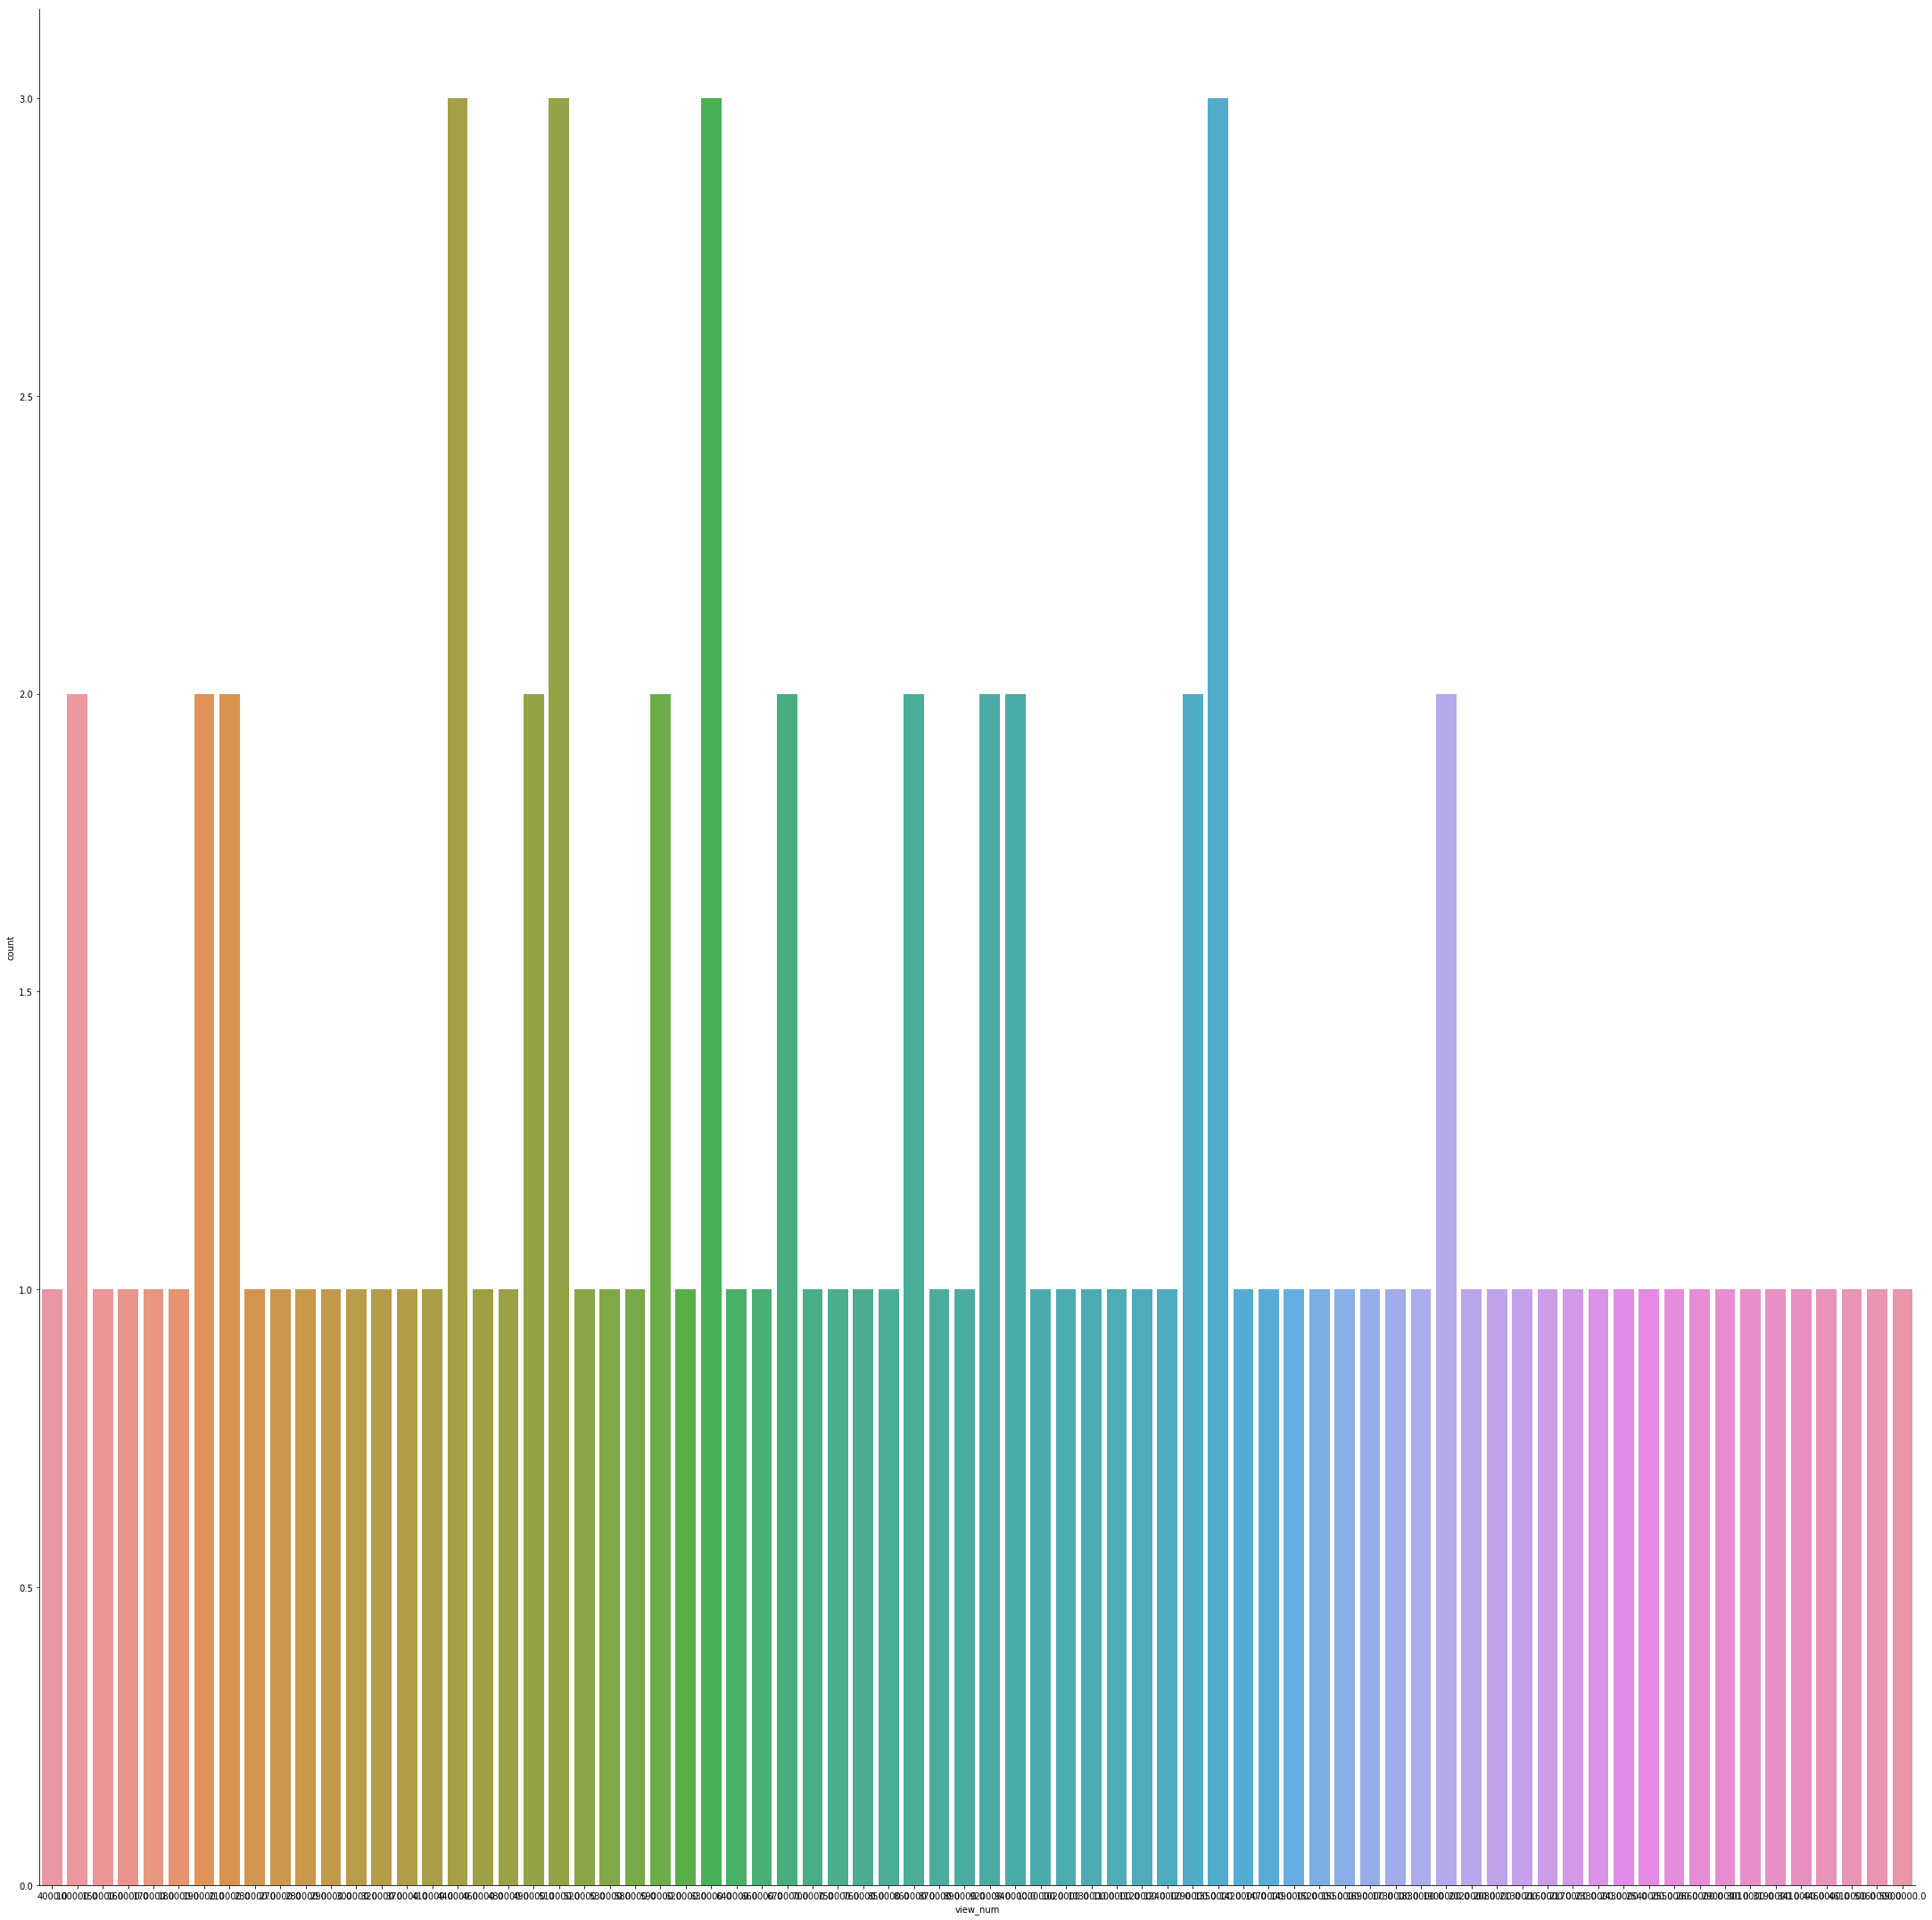

In [31]:
# seaborn 이용해서 데이터 시각화
import seaborn as sns
g = sns.catplot('view_num', data=youtube, kind='count', height=30)

In [15]:
# view_num을 범위로 나눠서 새로운 데이터열(view_num2) 추가 (데이터셋을 만들기위해)
youtube["view_num2"]=0
for index in range(len(youtube)):
    view_num = youtube['view_num'][index]
    if(view_num<500000):
        youtube.loc[index, 'view_num2'] = 0
    elif (view_num<1000000):
        youtube.loc[index, 'view_num2'] = 1
    else :
        youtube.loc[index, 'view_num2'] = 2
youtube.head()

,title,video_time,view_num,view_num2
0,'우리 가게를 와본 사람보다 안 와본 사람이 훨씬 많아요.' ㅣ 백종원의 장사이야기,405,4000.0,0
1,정말 쉽게 만드는 마파두부!! ㅣ 백종원의 쿠킹로그,452,270000.0,0
2,맥주 안주로 딱! 매콤새콤 골뱅이무침! ㅣ 백종원의 백종원 레시피,467,210000.0,0
3,'쉽게 알고 덤볐는데 막상 해보니까 어려워' 그게 외식업이에요. ㅣ 백종원의 장사이야기,429,100000.0,0
4,"베이컨땡초김밥/게맛살마요김밥/돼지불고기김밥/무말랭이김밥, 나만의 김밥을 만들어 보세...",955,410000.0,0


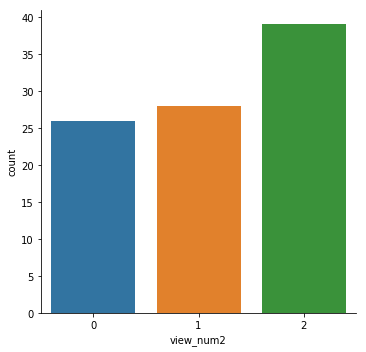

In [16]:
# 범위 나눈 값 시각화
g = sns.catplot('view_num2', data=youtube, kind='count', height=5)

## konlpy 로 형태소 분석

In [18]:
from konlpy.tag import Okt
twitter = Okt()
#명사와 형용사만 걸러내는 함수
def getNounAndAdject(text):
    stems = []
    tagged = twitter.pos(text, stem=True)
    for i in range(0, len(tagged)):
        if (tagged[i][1]=='Noun' or tagged[i][1]=='Adjective'):
            stems.append(tagged[i][0])
    return stems

C:\Users\JMLAP\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


## 형태소를 토큰화해서 TF-IDF벡터로 만드는 vectorizer 만듦

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=getNounAndAdject, min_df=2)

In [20]:
#학습데이터와 테스트 데이터 나눔
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(youtube["title"], youtube["view_num2"])

In [21]:
#학습데이터의 tfidf를 벡터화하고 vecterizer에 입력
X_train_vector = vectorizer.fit_transform(X_train)
X_train_vector.A

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.28893363, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.40550371, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
#테스트 데이터의 tfidf를 계산
X_test_vector = vectorizer.transform(X_test)

In [23]:
#X_train_vector를 데이터 프레임으로 변환
df_tfidf1 = pd.DataFrame(X_train_vector.A, columns=vectorizer.get_feature_names())
df_tfidf1

,가게,가족,간단,강,거,건,공개,국수,그,김밥,...,특집,편,프랜차이즈,한국,한번,한식,햄,화제,환상,활용
0,0.000000,0.000000,0.000000,0.000000,0.831435,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.253368,0.000000,0.000000,0.000000,0.577867,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288934,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354095,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.496450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.605445,0.000000,0.000000,0.000000,0.000000


## 결정트리 훈련시키기

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train_vector, y_train)

In [25]:
# 테스트 데이터로 예측해보기
dt_prediction1 = dt_clf.predict(df_tfidf1)
dt_prediction1

array([0, 2, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 0,
       2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 1, 1,
       1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0,
       0, 2, 2], dtype=int64)

In [26]:
# 새로운 데이터로 예측해보기
new_data_frame = pd.DataFrame({'title':
                               [
                                   '고등어 무 조림 맛있다',
                                   '치즈 듬뿍 토스트',
                                   '며느리도 돌아오는 전어 구이'
                                   '맛있는 돼지 고기'
                               ]})
df_tfidf = vectorizer.transform(new_data_frame['title'])
df_tfidf.A
dt_prediction = dt_clf.predict(df_tfidf)
dt_prediction

array([2, 2, 2], dtype=int64)

## 트리 시각화

In [27]:
#graphviz 이용해서 tree 시각화
from sklearn.tree import export_graphviz
dt_dot_data = export_graphviz(dt_clf, out_file=None, feature_names=df_tfidf1.columns ,class_names = ['bad', 'normal', 'good'],
                     rounded = True, filled = True)

In [28]:
#import pydotplus
import os
#os.pathsep
os.environ['PATH']+=';c:/ai/program/graphviz/bin/;'
os.environ['PATH']

'C:\\Users\\JMLAP\\Anaconda3;C:\\Users\\JMLAP\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\JMLAP\\Anaconda3\\Library\\usr\\bin;C:\\Users\\JMLAP\\Anaconda3\\Library\\bin;C:\\Users\\JMLAP\\Anaconda3\\Scripts;C:\\Users\\JMLAP\\Anaconda3\\bin;C:\\Users\\JMLAP\\Anaconda3\\condabin;C:\\oraclexe\\app\\oracle\\product\\11.2.0\\server\\bin;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\WINDOWS\\System32\\OpenSSH\\;C:\\Program Files\\Microsoft VS Code\\bin;C:\\Program Files\\Git\\cmd;C:\\Ruby26-x64\\bin;C:\\Program Files\\Java\\jdk1.8.0_231\\bin;C:\\Ruby26-x64\\bin;C:\\Users\\JMLAP\\AppData\\Local\\Microsoft\\WindowsApps;C:\\Program Files\\Bandizip\\;c:/ai/program/graphviz/bin/;'

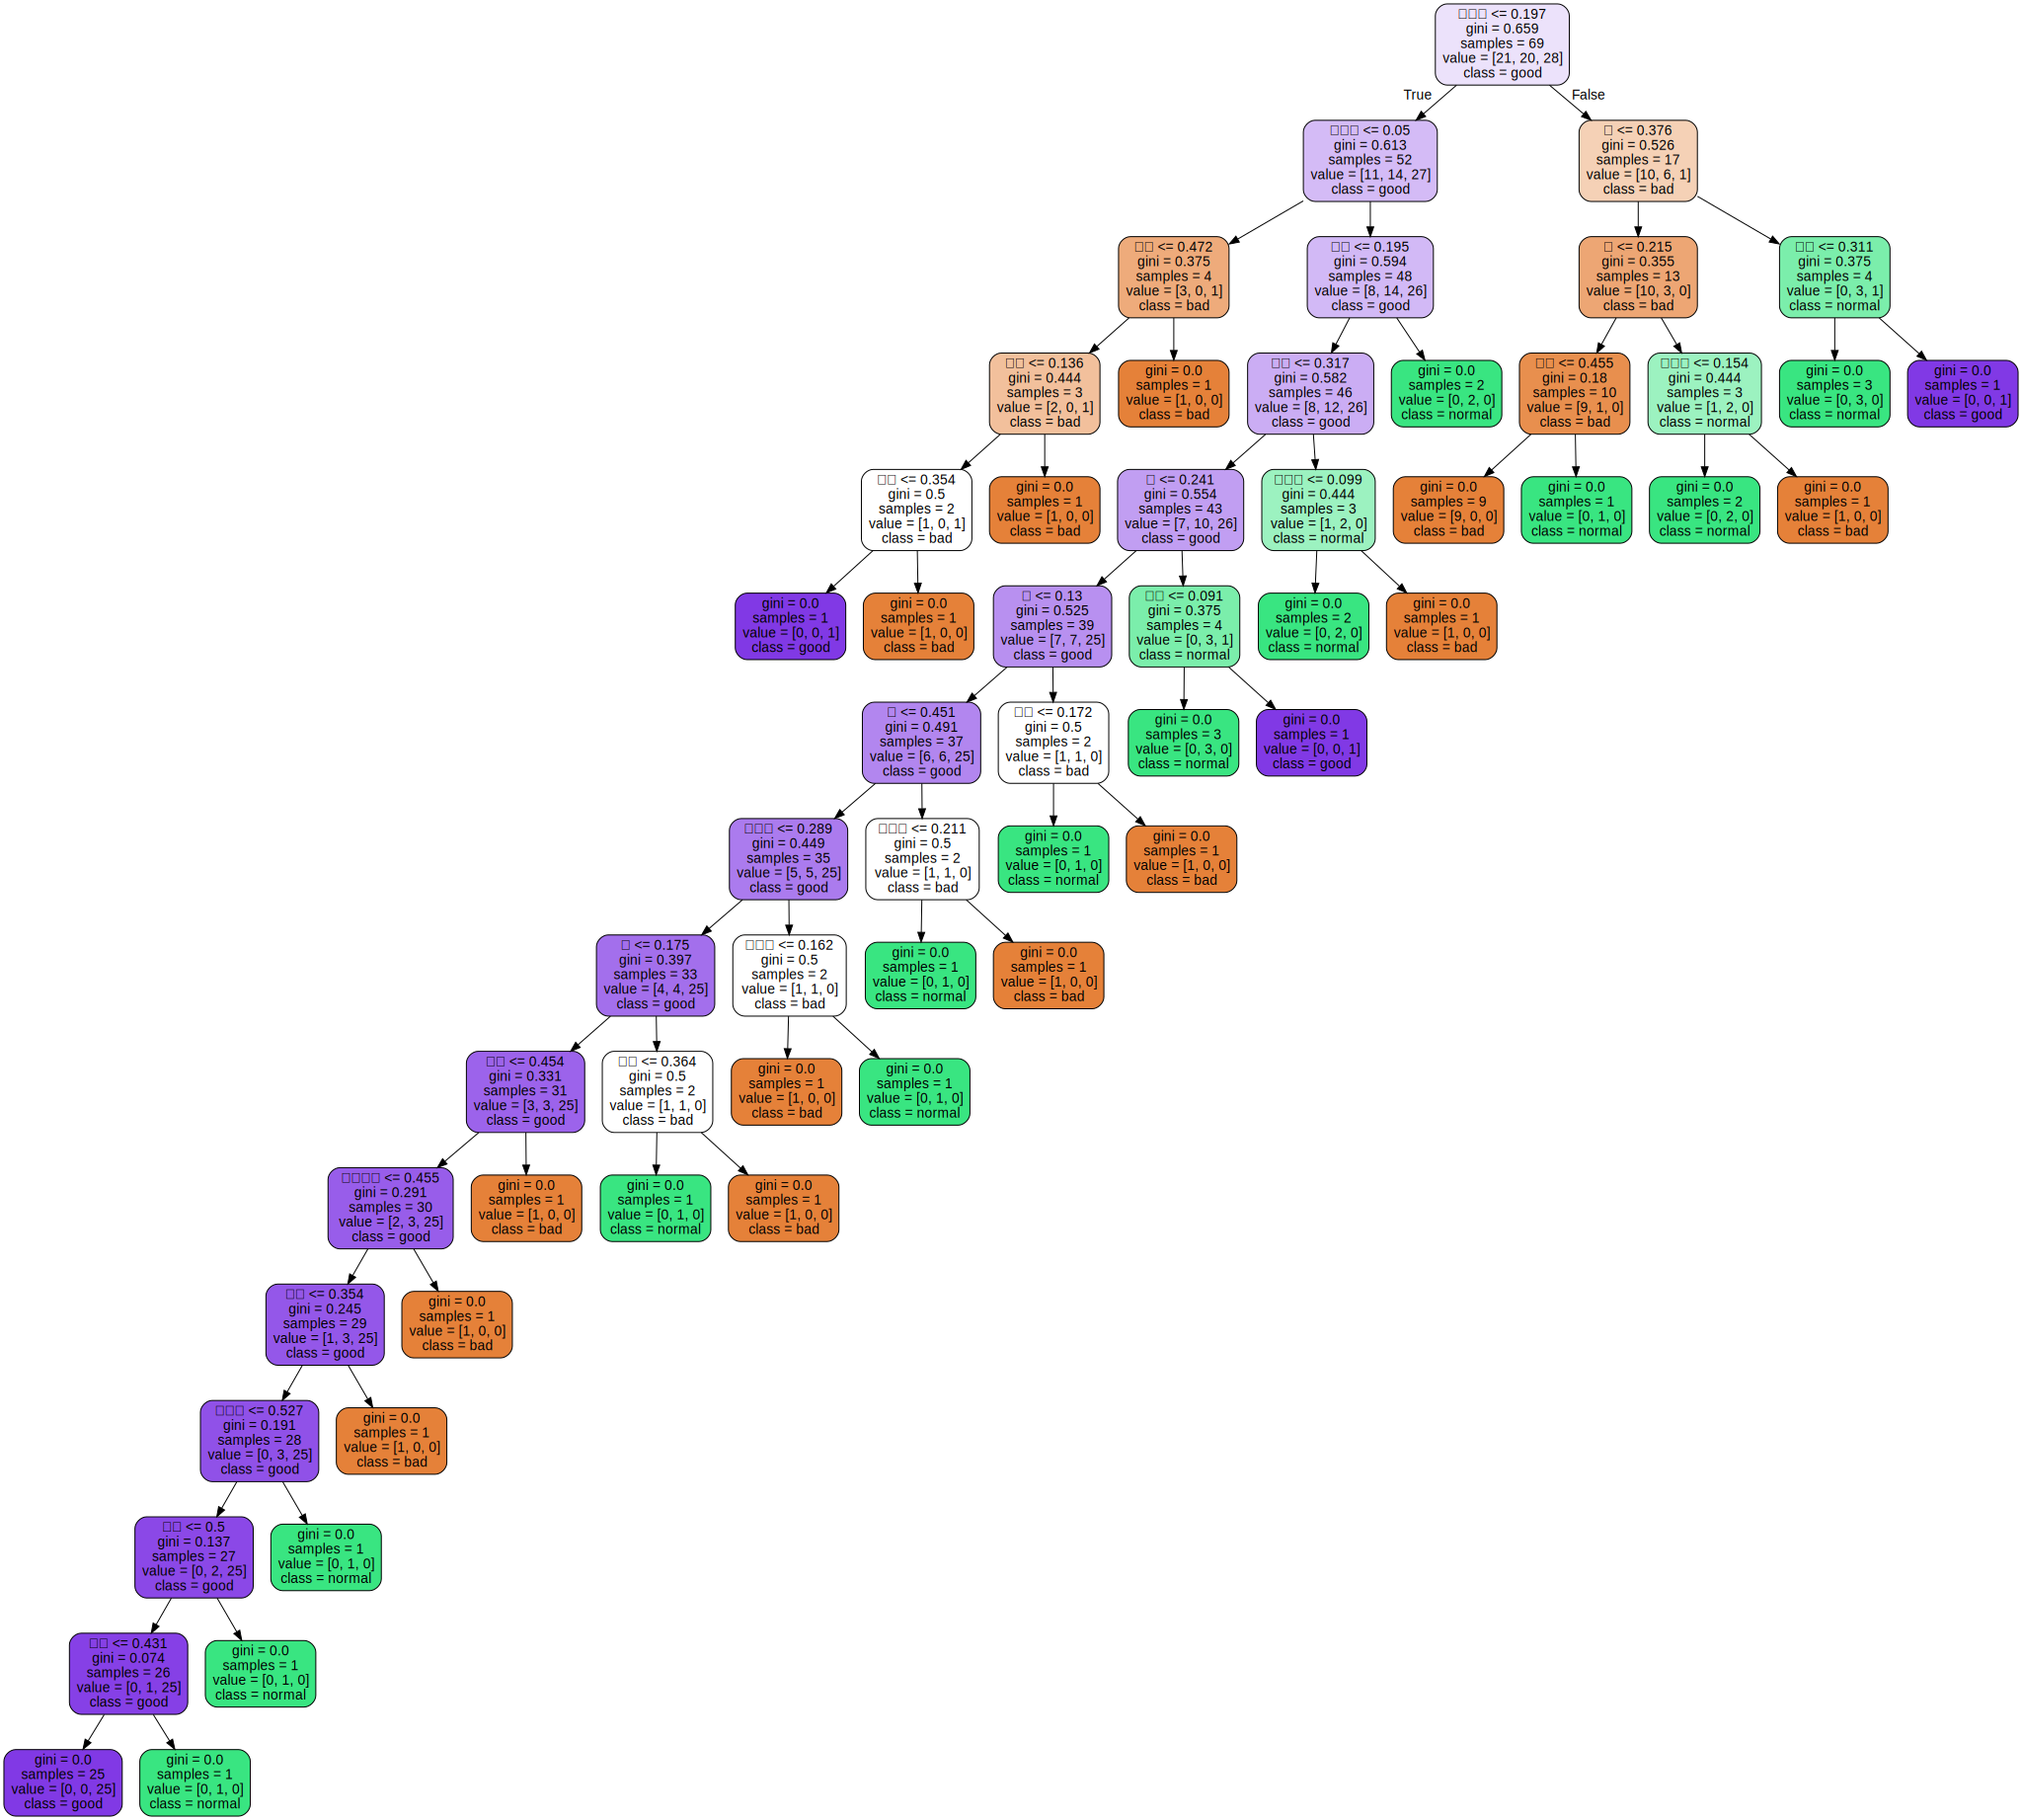

In [29]:
import graphviz
dt_graph = graphviz.Source(dt_dot_data,encoding='UTF-8')
dt_graph